### Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [6]:
import optuna
import optuna.exceptions
from xgboost import XGBRegressor

### Загрузка данных

Записали данные в df

In [7]:
df = pd.read_csv('laptopPrice.csv')

Вывели первые 5 значений

In [8]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


### Описание данных:
    
    -brand - марка
    
    -processor_brand -бренд процессора
    
    -processor_name - название процессора
    
    -processor_gnrtn - поколение процессора
    
    -ram_gb - оперативная память
    
    -ram_type -тип оперативной памяти
    
    -ssd - Solid-State Drive, твердотельные накопители 
    
    -hdd - обьем жесткого диска
    
    -os - операционная система
    
    -os_bit - разрядность операционной системы
    
    -graphic_card_gb - видиокарта
    
    -weight - масса
    
    -warranty - гарантия
    
    -Touchscreen - наличие сенсорного экрана
    
    -msoffice - наличие офиса
    
    -Price - цена
    
    -rating - рейтинг
    
    -Number of Ratings - количество оценок
    
    -Number of Reviews - количество отзывов

Вывели размер датасета

In [9]:
df.shape

(823, 19)

Посмотрели и удалили дубликаты

In [10]:
print(df.duplicated().sum())
df = df.drop_duplicates()

21


Посмотрели сколько уникальных значений в каждом столбце

In [11]:
df.nunique()

brand                  8
processor_brand        3
processor_name        11
processor_gnrtn        8
ram_gb                 4
ram_type               6
ssd                    7
hdd                    4
os                     3
os_bit                 2
graphic_card_gb        5
weight                 3
warranty               4
Touchscreen            2
msoffice               2
Price                405
rating                 5
Number of Ratings    282
Number of Reviews    135
dtype: int64

Вывели информацию о датасете

Пропусков нет

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              802 non-null    object
 1   processor_brand    802 non-null    object
 2   processor_name     802 non-null    object
 3   processor_gnrtn    802 non-null    object
 4   ram_gb             802 non-null    object
 5   ram_type           802 non-null    object
 6   ssd                802 non-null    object
 7   hdd                802 non-null    object
 8   os                 802 non-null    object
 9   os_bit             802 non-null    object
 10  graphic_card_gb    802 non-null    object
 11  weight             802 non-null    object
 12  warranty           802 non-null    object
 13  Touchscreen        802 non-null    object
 14  msoffice           802 non-null    object
 15  Price              802 non-null    int64 
 16  rating             802 non-null    object
 17  Nu

Вывели описание датасета

Увидели похожие на выбросы занчения в стобцах Number of Ratings

In [13]:
df.describe(include='all')

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
count,802,802,802,802,802,802,802,802,802,802,802,802,802,802,802,802.000000,802,802.00000,802.000000
unique,8,3,11,8,4,6,7,4,3,2,5,3,4,2,2,NaN,5,NaN,NaN
top,ASUS,Intel,Core i5,11th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,NaN,4 stars,NaN,NaN
freq,243,594,284,328,404,690,389,602,763,693,557,509,498,706,522,NaN,437,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76625.543641,NaN,299.84414,36.089776
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45232.984422,NaN,1001.78442,118.313553
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16990.000000,NaN,0.00000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45990.000000,NaN,0.00000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63990.000000,NaN,17.00000,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89525.000000,NaN,140.25000,18.000000


Вывели эти значения, решено их было оставить

In [14]:
df[df['Number of Ratings'] > 10000]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
21,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,23990,3 stars,15279,1947
196,acer,Intel,Core i5,Not Available,8 GB,DDR5,0 GB,512 GB,Windows,32-bit,4 GB,Casual,No warranty,No,No,50990,4 stars,10966,1185


Превратили столбцы ram_gb, ssd и hdd в числовые и добавили новые столбцы

total_storage_gb - это сумма всех объемов дисков

Touchscreen - закодировали в бинарные значения

price_per_gb_ram - это отношение Price к ram_gb_numeric

price_per_gb_storage - это отношение Price к total_storage_gb

In [15]:
def extract_numeric(value):
    if isinstance(value, str) and 'GB' in value:
        return int(value.split(' ')[0])
    return 0

df['ram_gb_numeric'] = df ['ram_gb'].apply(extract_numeric)
df ['ssd_numeric'] = df ['ssd'].apply(extract_numeric)
df ['hdd_numeric'] = df ['hdd'].apply(extract_numeric)

df ['total_storage_gb'] = df ['ssd_numeric'] + df ['hdd_numeric']

df ['Touchscreen'] = df ['Touchscreen'].map({'Yes': 1, 'No': 0})

df ['price_per_gb_ram'] = df ['Price'] / df['ram_gb_numeric']
df ['price_per_gb_storage'] = df ['Price'] / df['total_storage_gb'].replace(0, np.nan)

График ноутбуков разрынх компаний

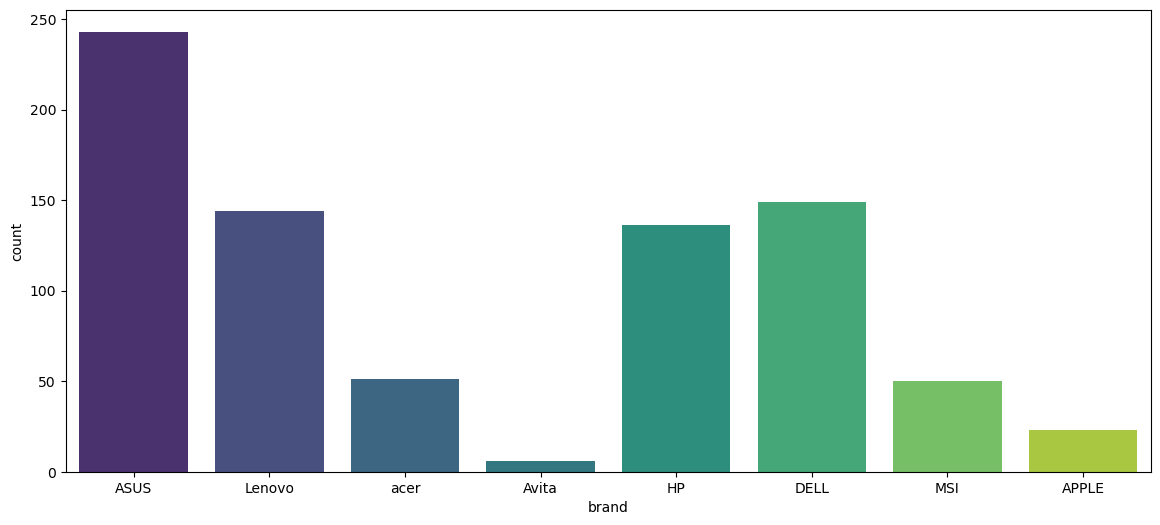

In [16]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x=df['brand'], palette='viridis')
plt.show()

Количество CPU разынх компаний 

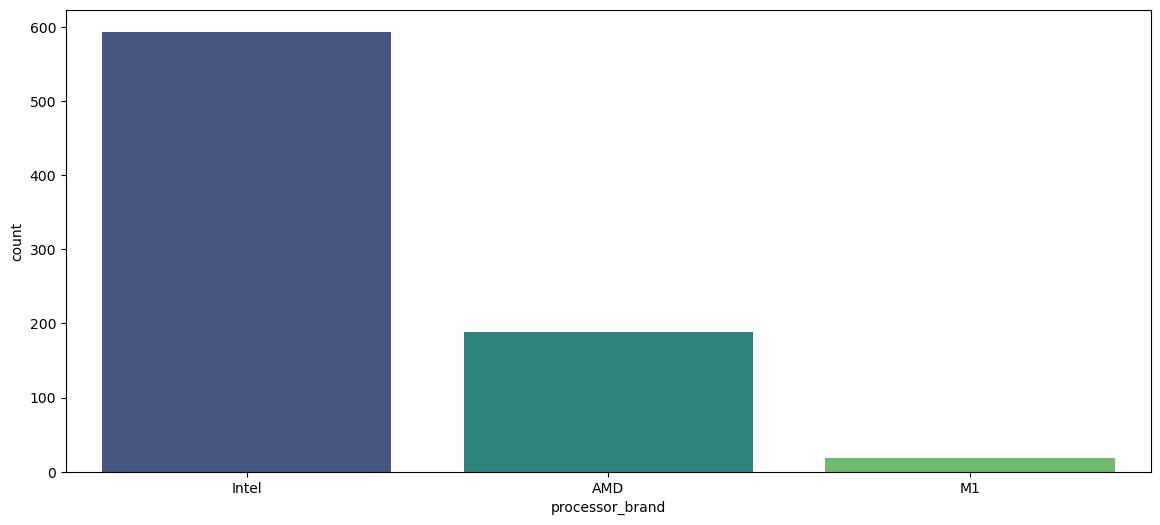

In [17]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x=df['processor_brand'], palette='viridis')
plt.show()

Количество разных моделей CPU

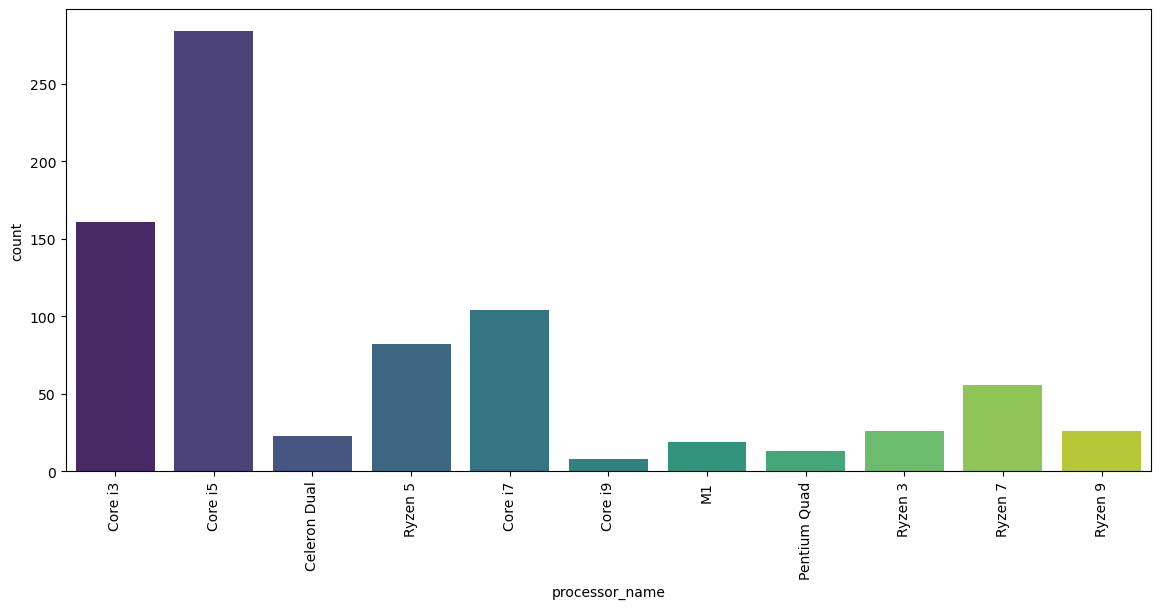

In [18]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x=df['processor_name'], palette='viridis')
ax.tick_params(axis='x', rotation=90)
plt.show()

График сумарного объема дисков в ноутбуке 

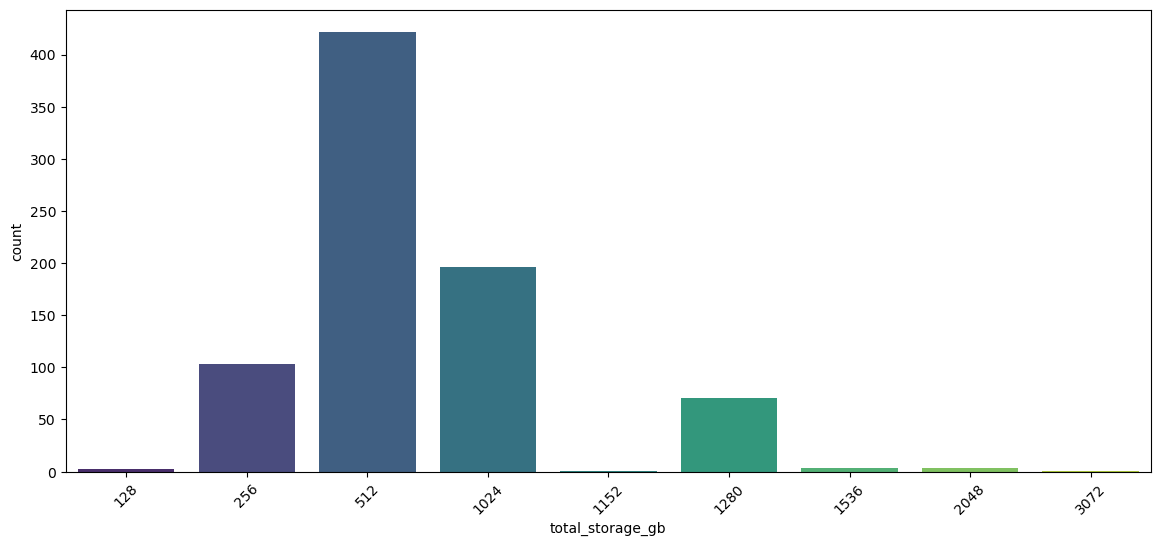

In [19]:
plt.subplots(figsize=(14,6))

ax = sns.countplot(x=df['total_storage_gb'], palette='viridis')
ax.tick_params(axis='x', rotation=45)
plt.show()

Популярность разных ОС и версии битности

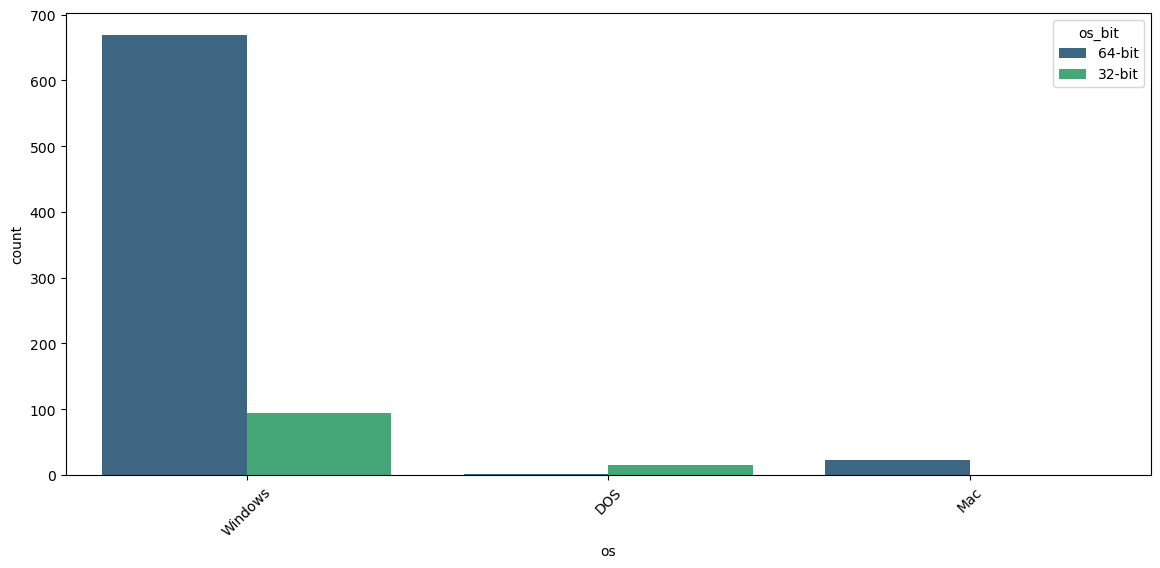

In [20]:
plt.subplots(figsize=(14,6))

ax = sns.countplot(x=df['os'], hue=df['os_bit'], palette='viridis')
ax.tick_params(axis='x', rotation=45)
plt.show()

Первый график количество ноутбуков которые поддерживают touchscreen 

Второй график отношения цены к наличию touchscreen в ноубке

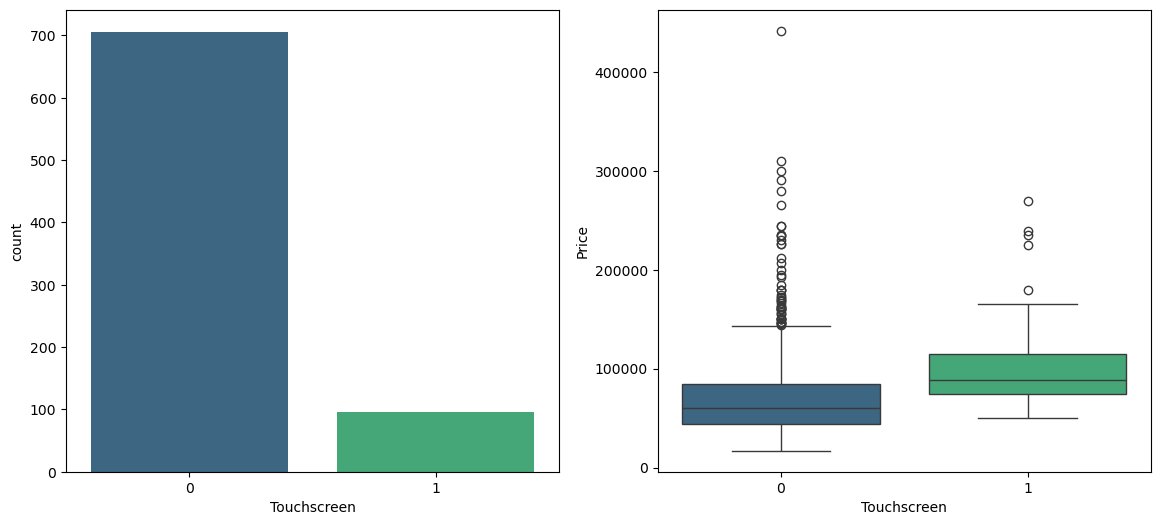

In [21]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))
sns.countplot(ax=axes[0], x=df['Touchscreen'], palette='viridis')
sns.boxplot(ax=axes[1], x=df['Touchscreen'], y=df['Price'], palette='viridis')
plt.show()

Первый график количество оперативной памяти

Второй график отношение цены к объему оперативной памяти

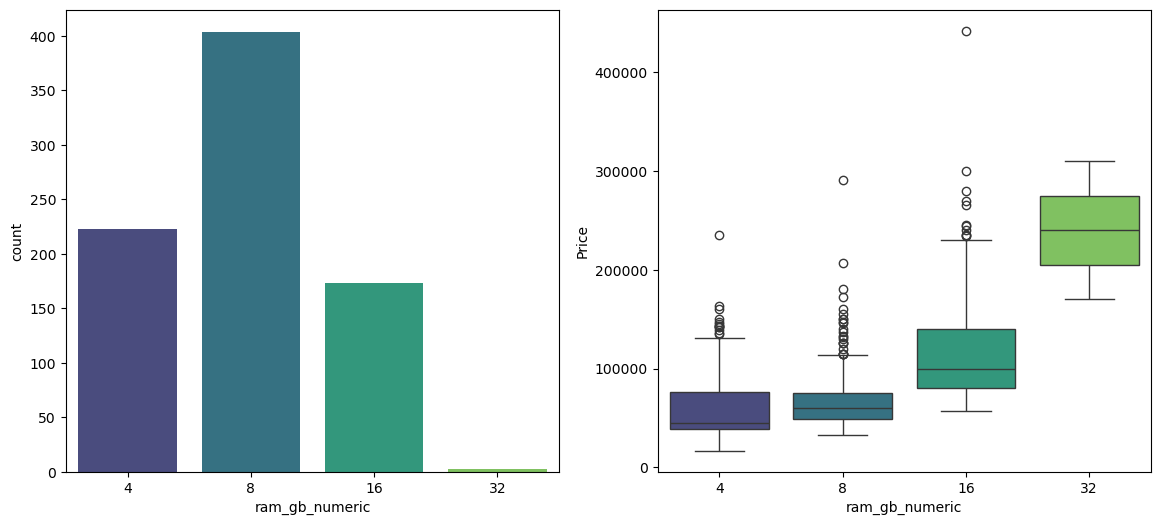

In [22]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=df['ram_gb_numeric'], palette='viridis')

sns.boxplot(ax=axes[1], x=df['ram_gb_numeric'], y=df['Price'], palette='viridis')
plt.show()

brand
ASUS      243
DELL      149
Lenovo    144
Name: count, dtype: int64


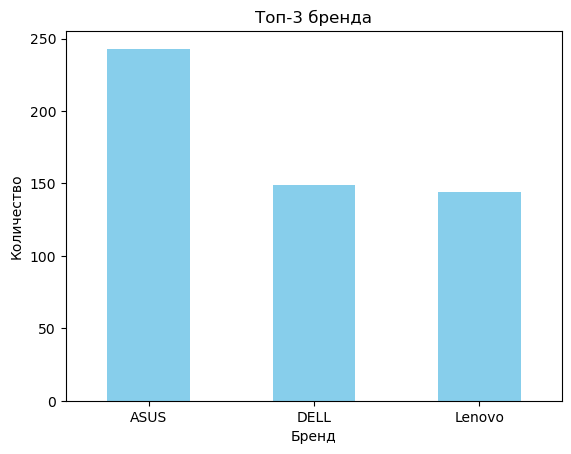

In [23]:
top_3 = df['brand'].value_counts().head(3)
print(top_3)
top_3.plot(kind='bar', color='skyblue')

plt.title('Топ-3 бренда')
plt.xlabel('Бренд')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

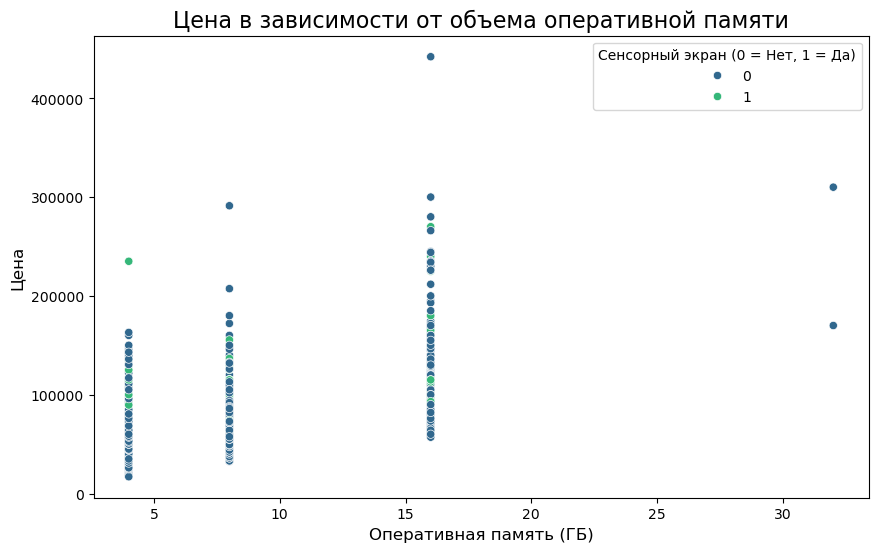

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram_gb_numeric', y='Price', hue='Touchscreen', data=df, palette='viridis')
plt.title('Цена в зависимости от объема оперативной памяти', fontsize=16)
plt.xlabel('Оперативная память (ГБ)', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.legend(title='Сенсорный экран (0 = Нет, 1 = Да)')
plt.show()

У Price похоже на нормальное распеределение со смещением в право

У price_per_gb_ram похоже на нормальное распеределение со смещением в право, но спуск не равномерный

У price_per_gb_storage похоже на нормальное распеределение со смещением в право и выступом в значения от 0 до 50

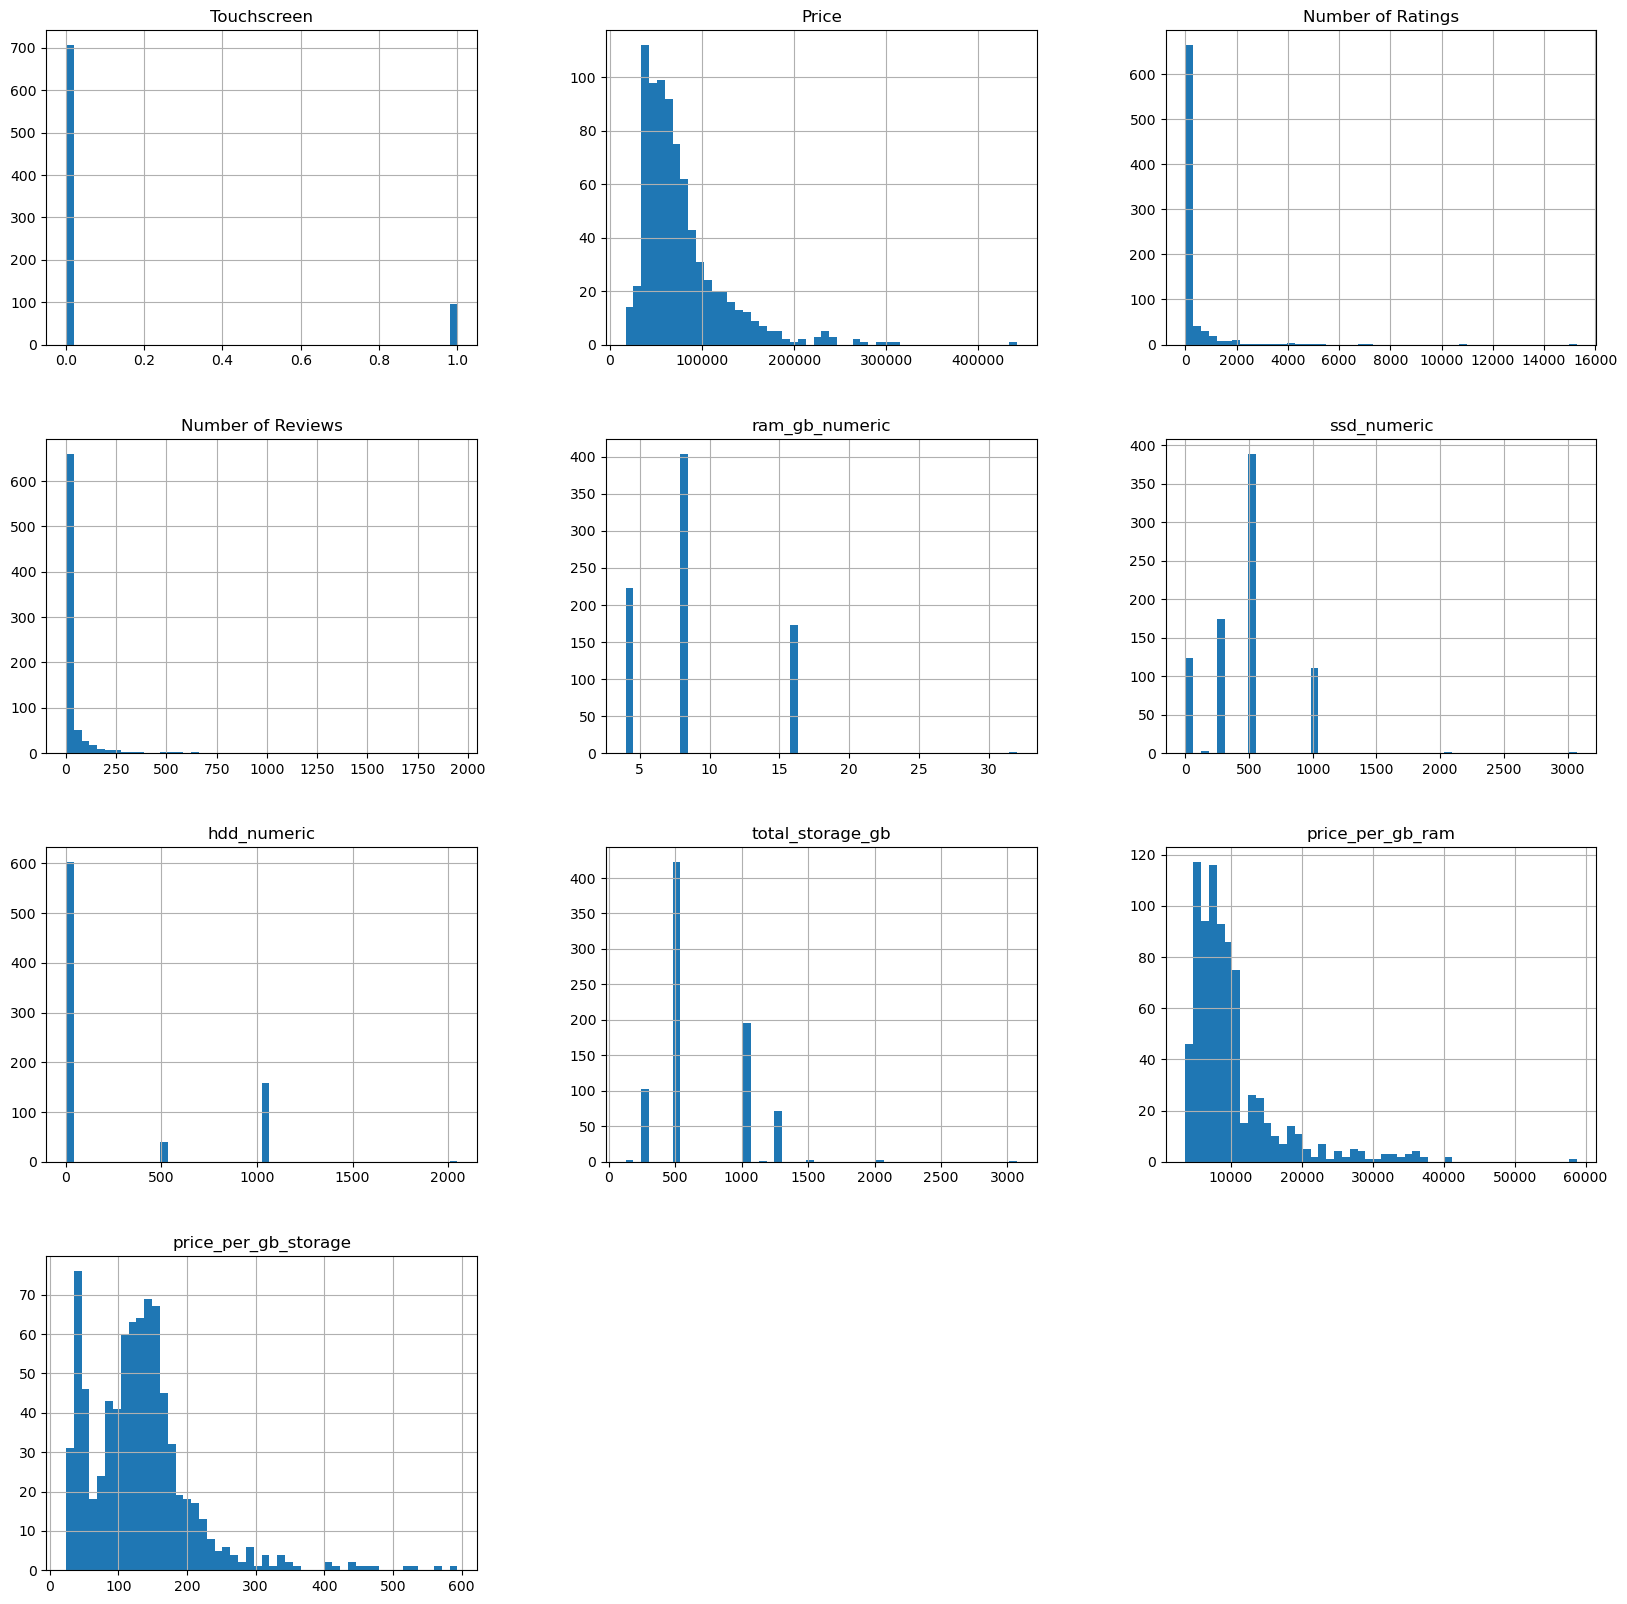

In [25]:
df.hist(figsize=(20,20),bins=50);
plt.show()

Отношение цены к рейтингу

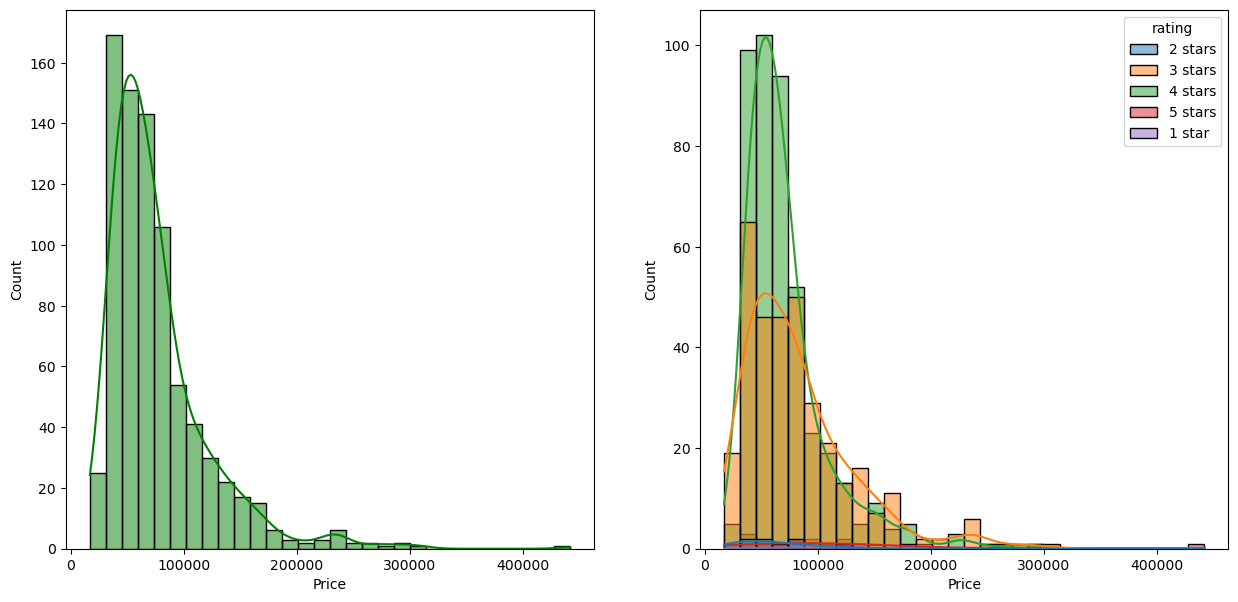

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x= 'Price', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x= 'Price', bins=30, kde=True, color='g', hue= 'rating')
plt.show()

Кодировака данных и удаление не нужных

In [27]:
label_encoder = LabelEncoder()
for i in df:
    if i == 'Price' or i == 'Number of Ratings' or i == 'Number of Reviews' or i == 'Touchscreen':
        continue
    df[i] = label_encoder.fit_transform(df[i])


df.drop("ssd", inplace=True, axis=1)
df.drop("hdd", inplace=True, axis=1)
df.drop("ram_gb", inplace=True, axis=1)

Зависимости заметны толь между столбцами 

Number of Reviews - Number of Ratings

price_per_gb_storage - Price

price_per_gb_storage - price_per_gb_ram

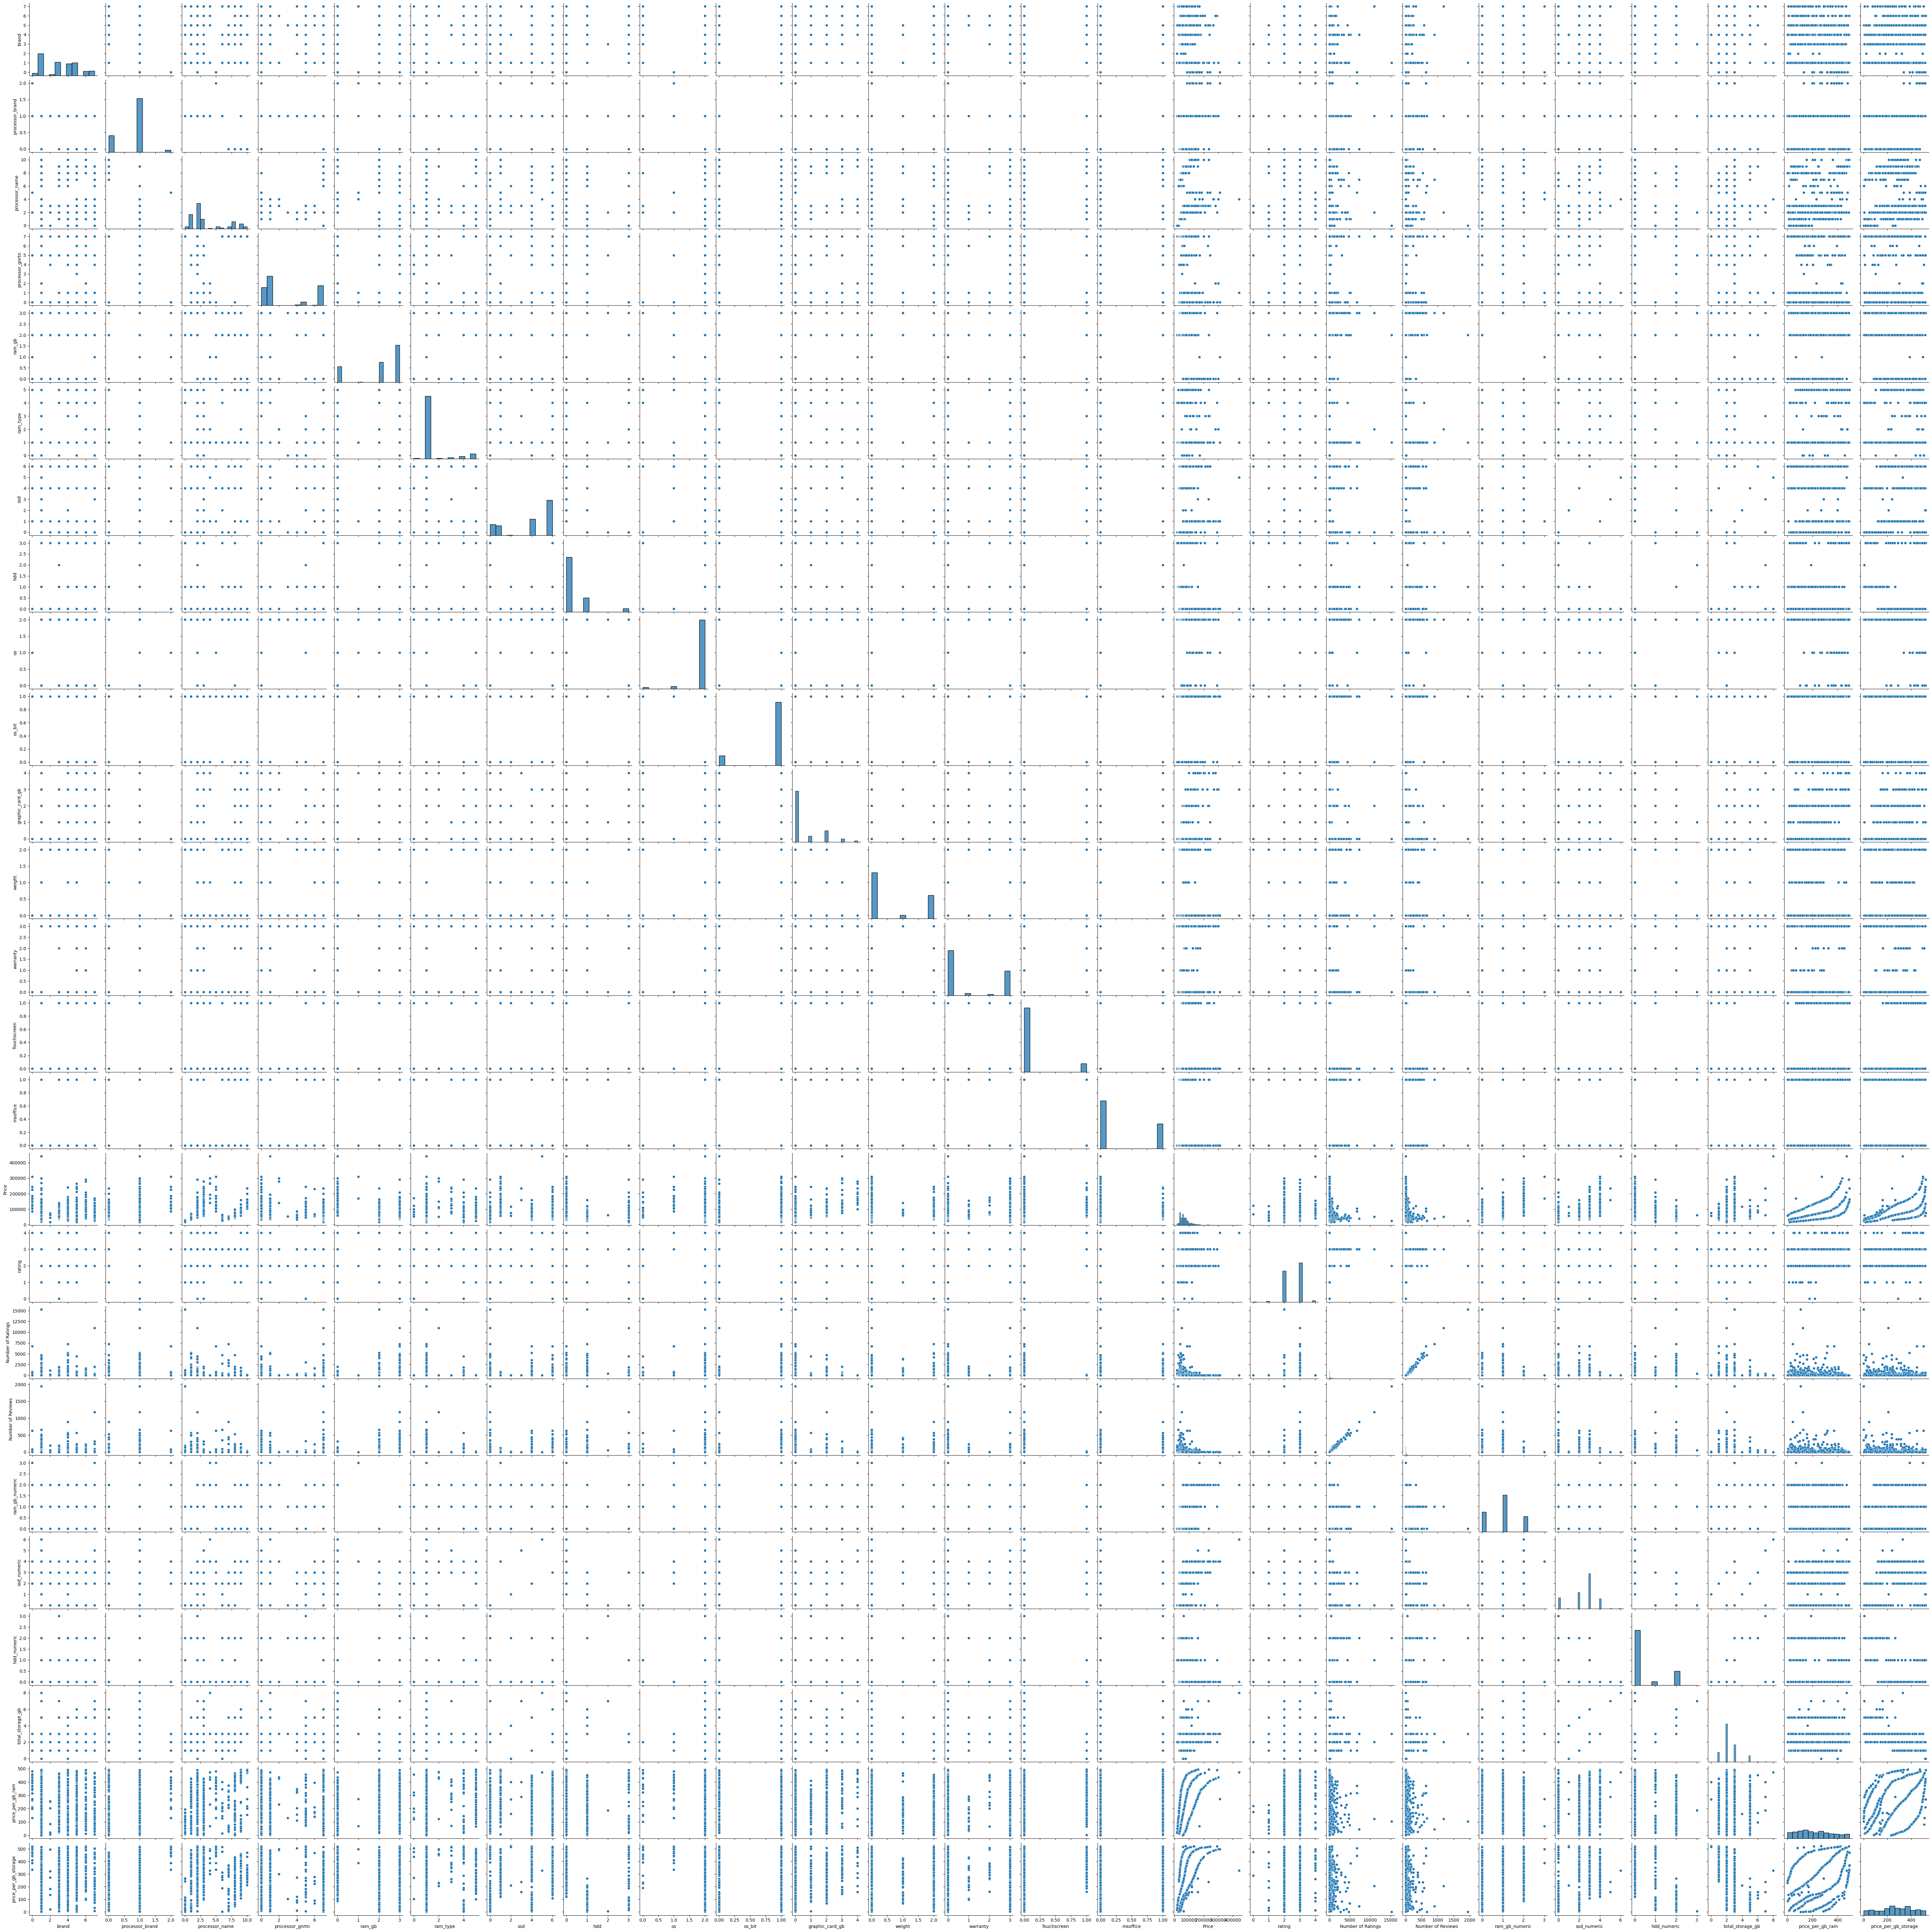

In [23]:
sns.pairplot(df)

#### Тепловая карта

##### Замечена высокая кореляция между:

    processor_brand - processor_name

    processor_brand - processor_gnrtn

    processor_gnrtn - processor_name

    ssd numeric - hdd_numeric

    price_per_gb_storage - hdd_numeric

##### Замечена умеренная корреляция между:

    price_per_gb_ram - ram_type

    price_per_gb_ram - Price

    rating - Number of Ratings

    Touchscreen - Price

    total_storage_gb - ssd_numeric

    price_per_gb_storage - ssd_numeric


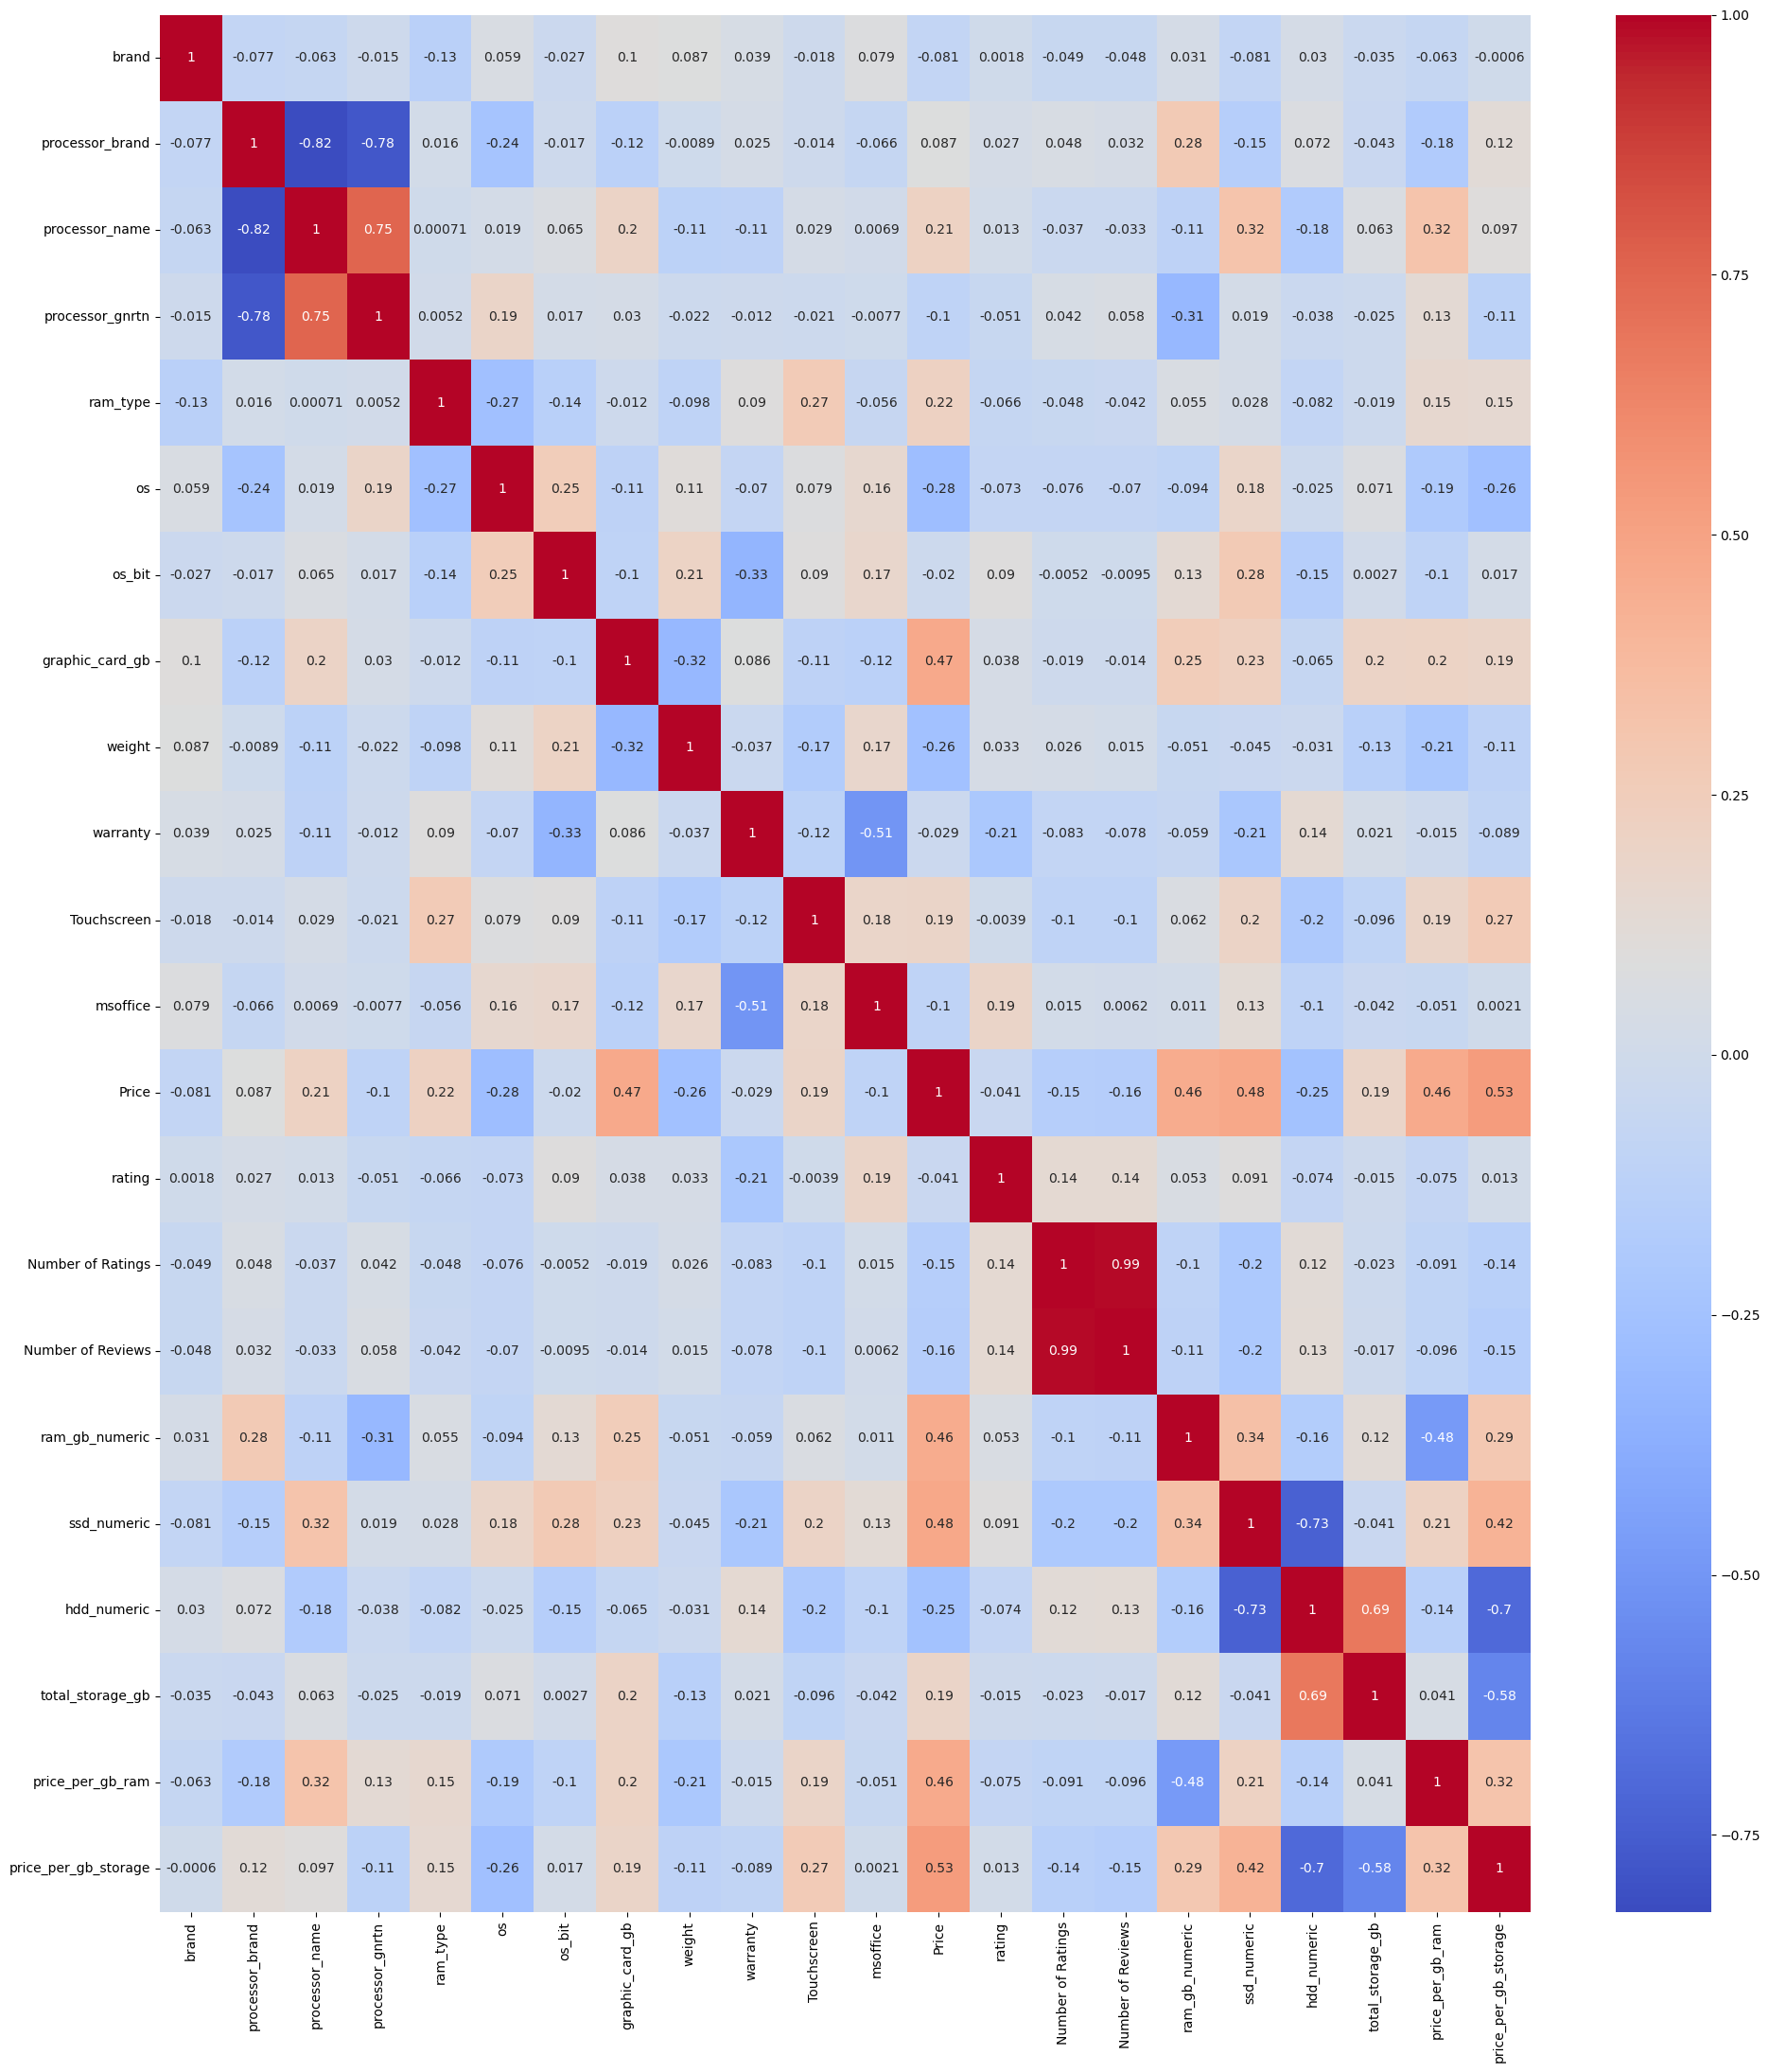

In [28]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 22))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2g')

plt.tight_layout()
plt.savefig('heatmap1.png', dpi=300)  # Укажите имя файла и качество (dpi)

plt.show()

Удаление низко корелирющих столбцов и которые отрицательно влияют на модели

In [29]:
df.drop("os_bit", inplace=True, axis=1)
df.drop("processor_gnrtn", inplace=True, axis=1)

### Копирование и разделение данных

Кодировка столбцов

In [43]:
categorical_columns = ['brand', 'processor_brand', 'ram_type','processor_name', 'os', 'graphic_card_gb', 'warranty', 'msoffice']

ohe = OneHotEncoder(drop='first', sparse_output=False)

encoded_features = ohe.fit_transform(df[categorical_columns])

encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_columns))

df_cat = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)
df_cat = df_cat.dropna()

Разделил данные на X и y - целевая

In [44]:
X = df_cat.copy()
X = X.drop('Price', axis=1)
y = df_cat['Price'].copy()

Разделил данные на тренеровачные и тестовые

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y ,test_size=0.33, random_state=42)

Логарифмирование всех признаков

In [63]:
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)
X_train = np.log1p(X_train)
X_test = np.log1p(X_test)

### Используем модель GradientBoostingRegressor

Обучаем модель

In [64]:
gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=42)

Предсакзываем результаты

In [65]:
gbr_pred = gbr.predict(X_test)

gbr_r2 = r2_score(Y_test, gbr_pred)
print(f"R^2 score with specified hyperparameters: {gbr_r2}")

R^2 score with specified hyperparameters: 0.9761785933965758


График распеределения

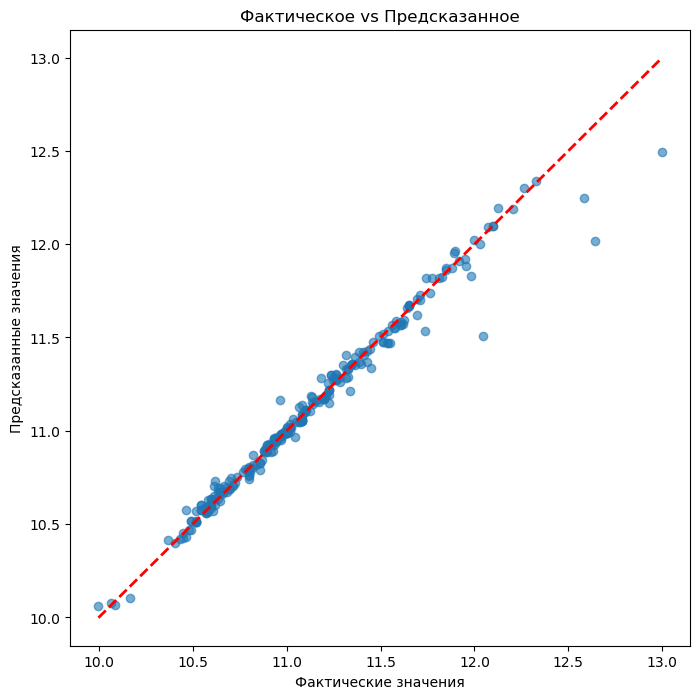

In [49]:
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, gbr_pred, alpha=0.6)
plt.plot([np.min(Y_test), np.max(Y_test)], [np.min(Y_test), np.max(Y_test)], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактическое vs Предсказанное')
plt.show()

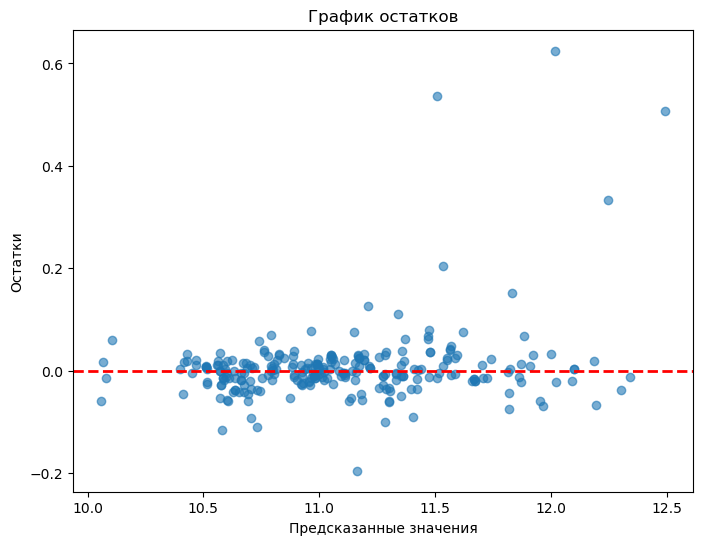

In [50]:
residuals = Y_test - gbr_pred

plt.figure(figsize=(8, 6))
plt.scatter(gbr_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

### Используем модель DecisionTreeRegressor

Обучаем модель

In [37]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

Предсакзываем результаты

In [38]:
dtr_pred = dtr.predict(X_test)

dtr_r2 = r2_score(Y_test, dtr_pred)
print(f"R^2 score with specified hyperparameters: {dtr_r2}")

R^2 score with specified hyperparameters: 0.9558410797668228


График распеределения

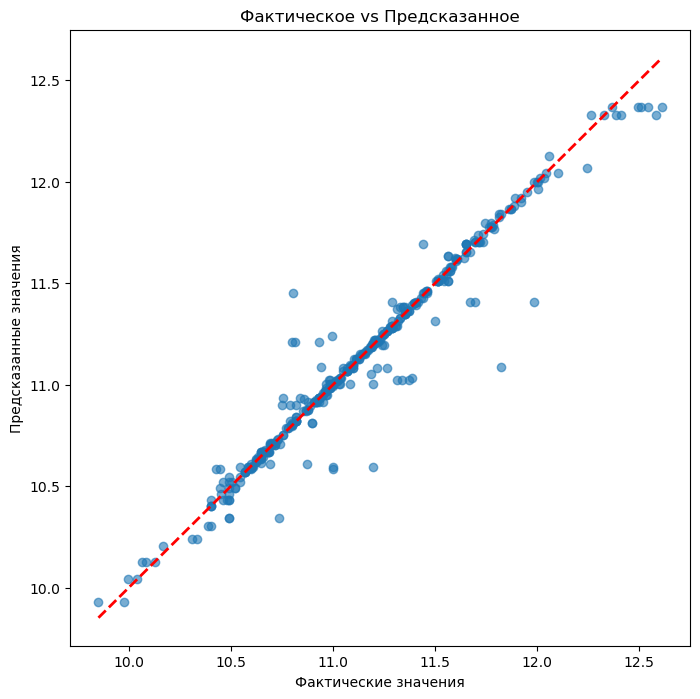

In [39]:
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, dtr_pred, alpha=0.6)
plt.plot([np.min(Y_test), np.max(Y_test)], [np.min(Y_test), np.max(Y_test)], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактическое vs Предсказанное')
plt.show()

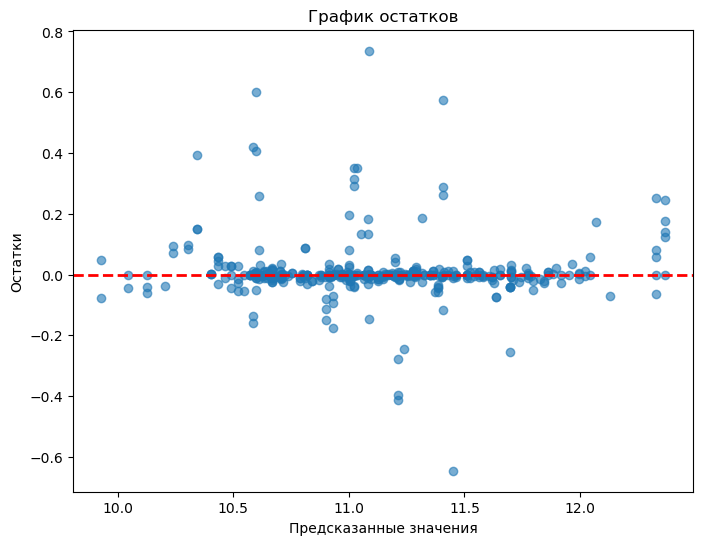

In [40]:
residuals = Y_test - dtr_pred

plt.figure(figsize=(8, 6))
plt.scatter(dtr_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

### Используем модель RandomForestRegressor

Обучаем модель

In [41]:
rfr = RandomForestRegressor(random_state=42)

rfr.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

Предсакзываем результаты

In [42]:
rfr_pred = rfr.predict(X_test)

rfr_r2 = r2_score(Y_test, rfr_pred)
print(f"R^2 score with specified hyperparameters: {rfr_r2}")

R^2 score with specified hyperparameters: 0.9806270363656743


График распеределения

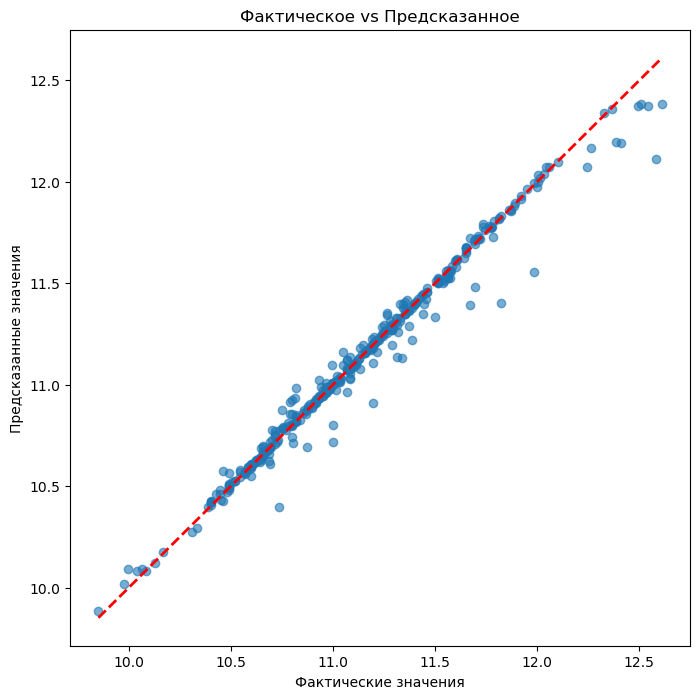

In [43]:
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, rfr_pred, alpha=0.6)
plt.plot([np.min(Y_test), np.max(Y_test)], [np.min(Y_test), np.max(Y_test)], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактическое vs Предсказанное')
plt.show()

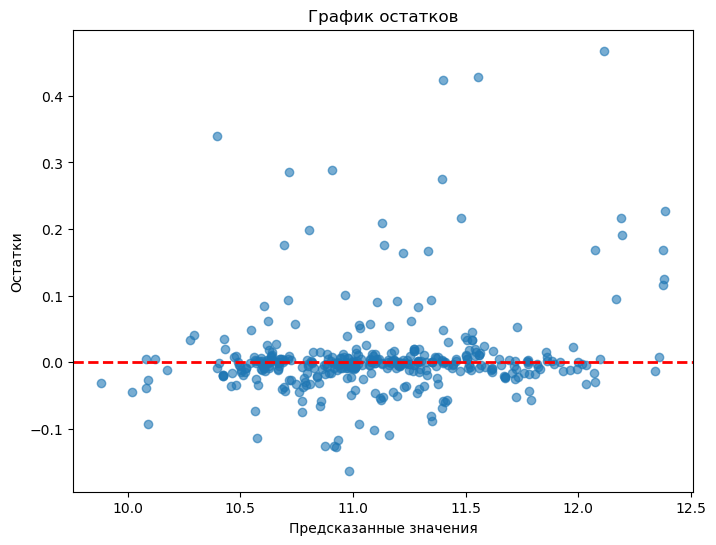

In [44]:
residuals = Y_test - rfr_pred

plt.figure(figsize=(8, 6))
plt.scatter(rfr_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

### Используем модель XGBRegressor

Обучаем модель

In [45]:
xgbr = XGBRegressor(random_state=42)

xgbr.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Предсакзываем результаты

In [46]:
xgbr_pred = xgbr.predict(X_test)

xgbr_r2 = r2_score(Y_test, xgbr_pred)
print(f"R^2 score with specified hyperparameters: {xgbr_r2}")

R^2 score with specified hyperparameters: 0.9761511042828723


График распеределения

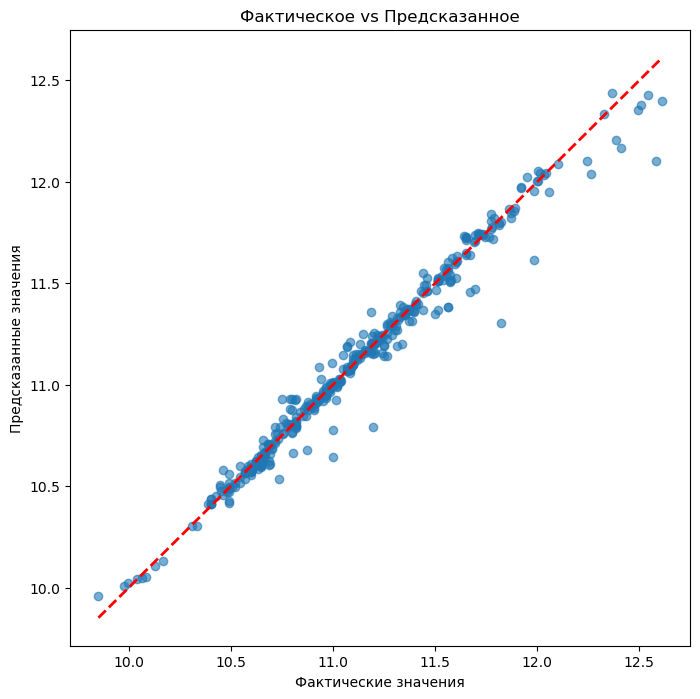

In [47]:
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, xgbr_pred, alpha=0.6)
plt.plot([np.min(Y_test), np.max(Y_test)], [np.min(Y_test), np.max(Y_test)], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактическое vs Предсказанное')
plt.show()

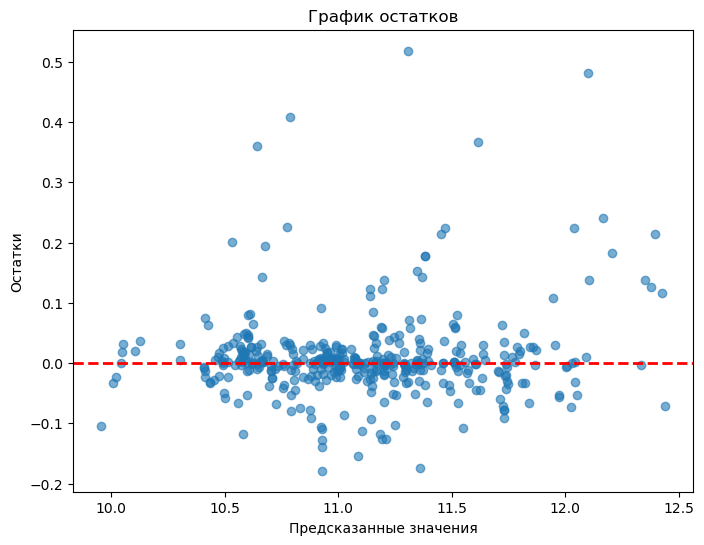

In [48]:
residuals = Y_test - xgbr_pred

plt.figure(figsize=(8, 6))
plt.scatter(xgbr_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()


Сравнение результатов моделей по R2 Score

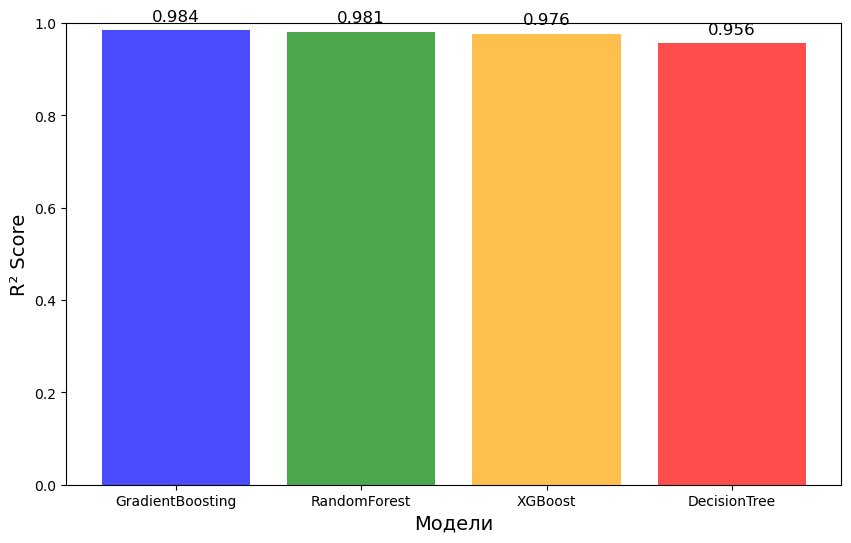

In [51]:
model_names = ['GradientBoosting', 'DecisionTree', 'RandomForest', 'XGBoost']
r2_scores = [gbr_r2, dtr_r2, rfr_r2, xgbr_r2]

sorted_indices = np.argsort(r2_scores)[::-1]
sorted_model_names = [model_names[i] for i in sorted_indices]
sorted_r2_scores = [r2_scores[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_model_names, sorted_r2_scores, color=['blue', 'green', 'orange', 'red'], alpha=0.7)
plt.xlabel('Модели', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.ylim(0, 1)
for i, score in enumerate(sorted_r2_scores):
    plt.text(i, score + 0.02, f'{score:.3f}', ha='center', fontsize=12)

plt.show()

### Настройка гипер параметров

Так как GradientBoostingRegressor самая лучшая модель на основе нее будем искать наилучшие параметры

Используем внешную библиотеку optuna для подбора гипер параметров

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import optuna

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 2000), 
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 0.1),  
        'max_depth': trial.suggest_int('max_depth', 3, 15), 
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'max_features': trial.suggest_uniform('max_features', 0.5, 1.0),
        'random_state': trial.suggest_int('random_state', 0, 100)
    }

    model = GradientBoostingRegressor(**param)

    model.fit(X_train, Y_train)

    predictions = model.predict(X_test)

    return r2_score(Y_test, predictions)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best hyperparameters: ", study.best_params)

best_params = study.best_params
best_model = GradientBoostingRegressor(**best_params)

best_model.fit(X_train, Y_train)

predictions = best_model.predict(X_test)
r2 = r2_score(Y_test, predictions)
print(f"R^2 score with best hyperparameters: {r2}")


[I 2024-11-29 10:48:15,810] A new study created in memory with name: no-name-58f17b2f-9989-4e28-a1c0-3375c9937d87
[I 2024-11-29 10:48:17,810] Trial 0 finished with value: 0.977644762596529 and parameters: {'n_estimators': 1286, 'learning_rate': 0.015540584288437919, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 18, 'subsample': 0.6871650734283585, 'max_features': 0.6890614662641557, 'random_state': 88}. Best is trial 0 with value: 0.977644762596529.
[I 2024-11-29 10:48:21,336] Trial 1 finished with value: 0.949351349477103 and parameters: {'n_estimators': 1835, 'learning_rate': 0.001031773869487098, 'max_depth': 13, 'min_samples_split': 18, 'min_samples_leaf': 3, 'subsample': 0.7988161973373014, 'max_features': 0.7643859253747138, 'random_state': 31}. Best is trial 0 with value: 0.977644762596529.
[I 2024-11-29 10:48:21,500] Trial 2 finished with value: 0.09680959879408824 and parameters: {'n_estimators': 119, 'learning_rate': 0.0005045636128234905, 'max_depth': 8, 'min_

Best hyperparameters:  {'n_estimators': 485, 'learning_rate': 0.03621942751648296, 'max_depth': 3, 'min_samples_split': 18, 'min_samples_leaf': 1, 'subsample': 0.8464305941352688, 'max_features': 0.9972366226833138, 'random_state': 28}
R^2 score with best hyperparameters: 0.9900394674659843


Нашли гипер параметры и применили

In [73]:
params = {'n_estimators': 485, 'learning_rate': 0.03621942751648296, 'max_depth': 3, 
          'min_samples_split': 18, 'min_samples_leaf': 1,
          'subsample': 0.8464305941352688, 
          'max_features': 0.9972366226833138, 'random_state': 28}
best_model = GradientBoostingRegressor(
    **params
)
best_model.fit(X_train, Y_train)
predictions = best_model.predict(X_test)
r2 = r2_score(Y_test, predictions)
print(f"R^2 score with best hyperparameters: {r2}")

R^2 score with best hyperparameters: 0.9900394674659843


График сравнения R^2 score старой модели и новой

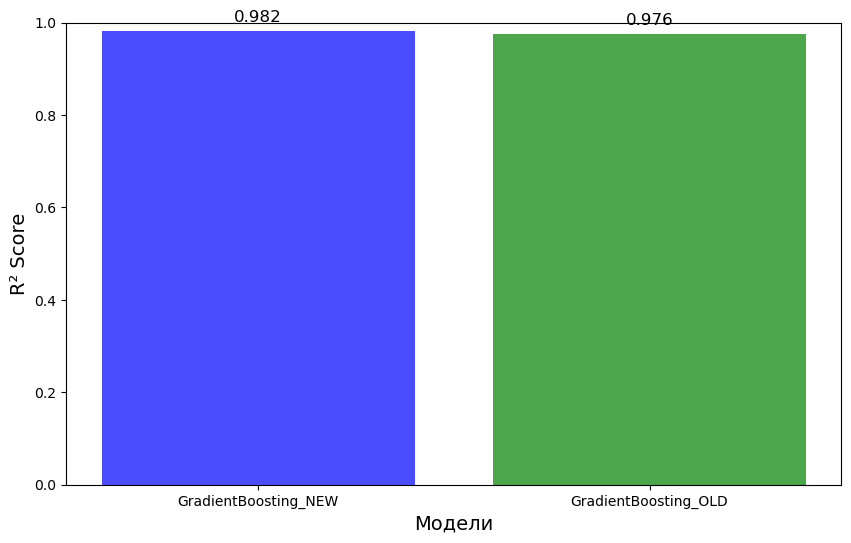

In [53]:
model_names = ['GradientBoosting_OLD', 'GradientBoosting_NEW']
r2_scores = [gbr_r2,r2]

sorted_indices = np.argsort(r2_scores)[::-1]
sorted_model_names = [model_names[i] for i in sorted_indices]
sorted_r2_scores = [r2_scores[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_model_names, sorted_r2_scores, color=['blue', 'green', 'orange', 'red'], alpha=0.7)
plt.xlabel('Модели', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.ylim(0, 1)
for i, score in enumerate(sorted_r2_scores):
    plt.text(i, score + 0.02, f'{score:.3f}', ha='center', fontsize=12)

plt.show()

### Вывод

Самая лучшая модель GradientBoosting, но остальные модели не сильно хуже

Были закодированы не числовые столбцы, были высоко коррелирующие значения

Данных не так много, но достаточно для обучения

Есть пару аномальных значений, но мы их оставили для того чтобы модель могла работать с такими данными

R^2 score with specified hyperparameters: 0.985709145683974


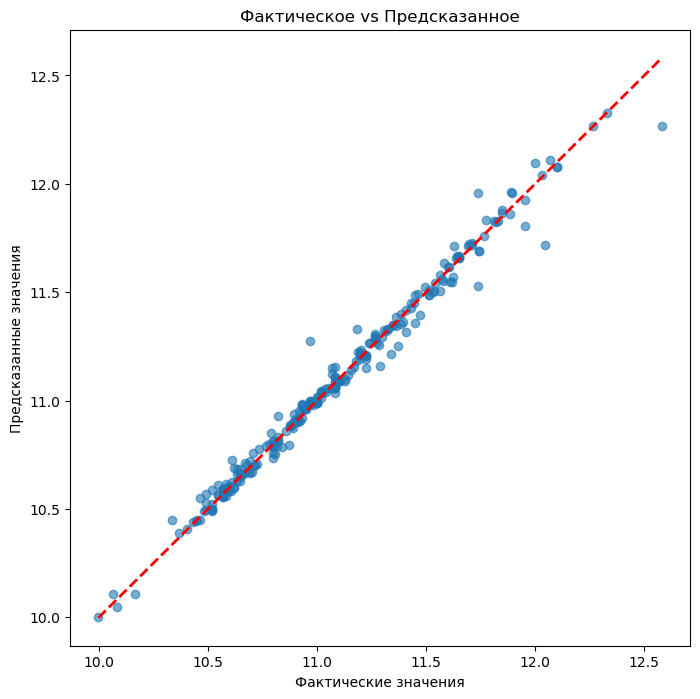

In [69]:
df = df[df['Price'] < 330000]
categorical_columns = ['brand', 'processor_brand', 'ram_type','processor_name', 'os', 'graphic_card_gb', 'warranty', 'msoffice']

ohe = OneHotEncoder(drop='first', sparse_output=False)

encoded_features = ohe.fit_transform(df[categorical_columns])

encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_columns))

df_cat = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)
df_cat = df_cat.dropna()

X = df_cat.copy()
X = X.drop('Price', axis=1)
y = df_cat['Price'].copy()

X_train, X_test, Y_train, Y_test = train_test_split(X, y ,test_size=0.33, random_state=42)

Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)
X_train = np.log1p(X_train)
X_test = np.log1p(X_test)

gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train, Y_train)

gbr_pred = gbr.predict(X_test)

gbr_r2 = r2_score(Y_test, gbr_pred)
print(f"R^2 score with specified hyperparameters: {gbr_r2}")

plt.figure(figsize=(8, 8))
plt.scatter(Y_test, gbr_pred, alpha=0.6)
plt.plot([np.min(Y_test), np.max(Y_test)], [np.min(Y_test), np.max(Y_test)], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактическое vs Предсказанное')
plt.show()